In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

# Random Forest

In [3]:
cd ~/Desktop/Tesis/Notebooks-Git/Training/StickSlip

/home/luis/Desktop/Tesis/Notebooks-Git/Training/StickSlip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns

In [5]:
df = pd.read_csv("TrainingVss.csv")

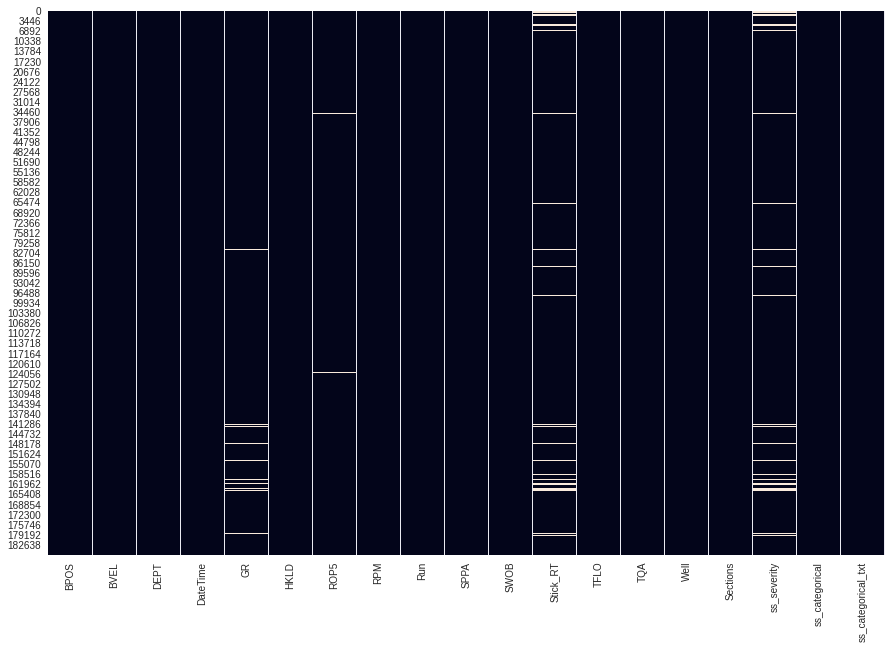

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
df.dropna(inplace=True)

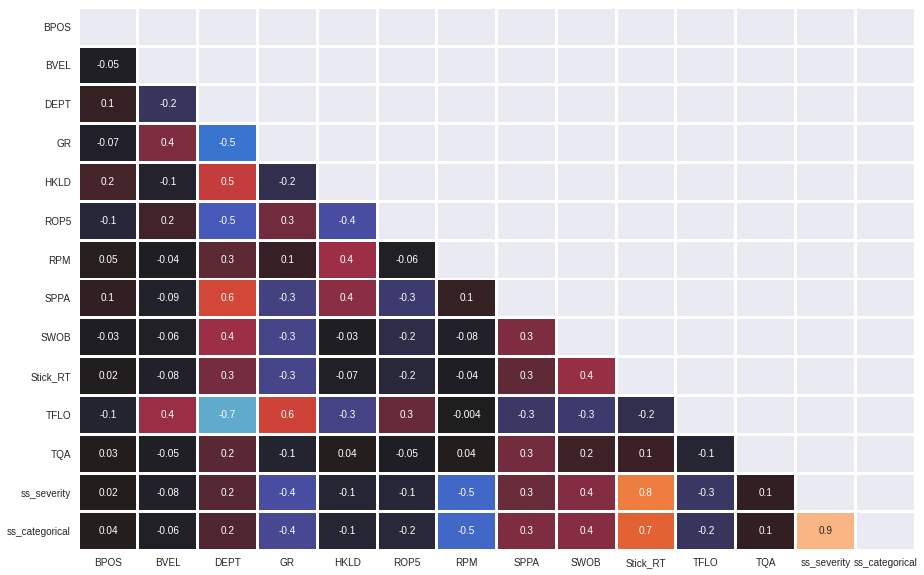

In [8]:
plt.figure(figsize=(15,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix,fmt = '.1g',linewidths=2,vmin=-1, vmax=1, center= 0,cbar=False)
plt.show()

In [9]:
df.columns

Index(['BPOS', 'BVEL', 'DEPT', 'DateTime', 'GR', 'HKLD', 'ROP5', 'RPM', 'Run',
       'SPPA', 'SWOB', 'Stick_RT', 'TFLO', 'TQA', 'Well', 'Sections',
       'ss_severity', 'ss_categorical', 'ss_categorical_txt'],
      dtype='object')

## Splitting sets

In [12]:
from sklearn.model_selection import train_test_split

In [28]:
x_cols = df.columns.difference(['Well','Sections','ss_severity','ss_categorical','ss_categorical_txt',"DateTime","Run"])

In [29]:
X = df[x_cols]
Y = df["ss_categorical"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [30]:
print("Predictors:\n\t",x_cols)
print("\nSet shapes:\t")
print("\tTraining:\n\t\tX:",x_train.shape,"\n\t\tY:",y_train.shape)
print("\tTesting:\n\t\tX:",x_test.shape,"\n\t\tY:",y_test.shape)

Predictors:
	 Index(['BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA', 'SWOB',
       'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

Set shapes:	
	Training:
		X: (139248, 12) 
		Y: (139248,)
	Testing:
		X: (34813, 12) 
		Y: (34813,)


## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
%%time
rf = RandomForestClassifier(n_estimators=100,max_depth=None, min_samples_split=4, min_samples_leaf=2,max_features='auto', bootstrap=True, n_jobs=-1,random_state=2).fit(x_train,y_train)

CPU times: user 1min 40s, sys: 707 ms, total: 1min 41s
Wall time: 50.5 s


In [42]:
y_pred = rf.predict(x_test)

In [44]:
print("Accuracy:",round((accuracy_score(y_test, y_pred)*100),4),"%")

Accuracy: 99.8592 %


In [46]:
feat = np.sort(rf.feature_importances_)

<ipython-input-47-86abf62d6d15>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(feat,labels=x_cols,autopct='%1.1f%%')


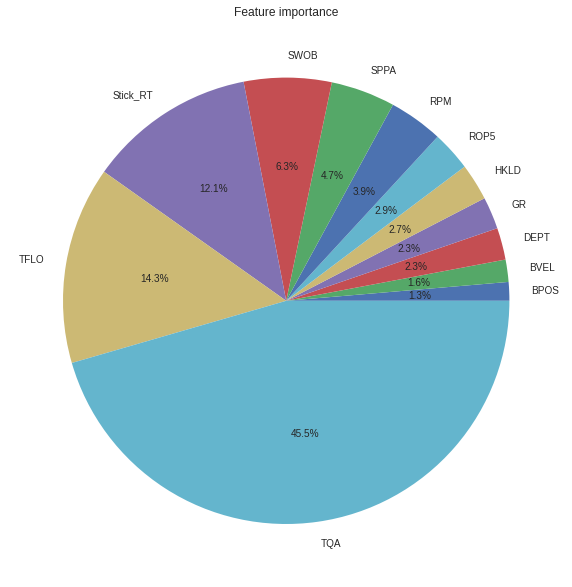

In [47]:
plt.figure(figsize=(10,15))
plt.pie(feat,labels=x_cols,autopct='%1.1f%%')
plt.title("Feature importance")
plt.show()

## Prediction

In [49]:
df_rf = df
df_rf["Count"] = np.arange(len(df))

In [50]:
df_rf["rf"] = rf.predict(X)

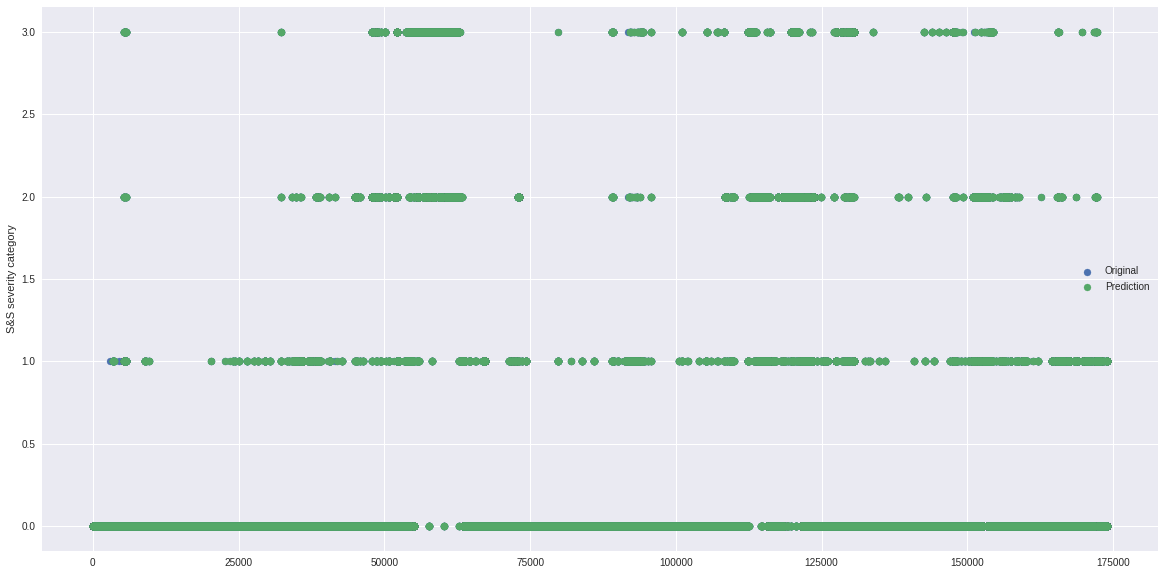

In [51]:
plt.figure(figsize = (20,10))
plt.scatter(df_rf["Count"],df_rf["ss_categorical"],label="Original")
plt.scatter(df_rf["Count"],df_rf["rf"],label="Prediction")
plt.ylabel("S&S severity category")
plt.legend()
plt.show()

## ROC Curve

In [52]:
from sklearn.metrics import classification_report

In [53]:
report = classification_report(y_test,y_pred)

In [54]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29197
           1       0.99      0.99      0.99      1768
           2       0.99      1.00      0.99      2111
           3       1.00      0.99      1.00      1737

    accuracy                           1.00     34813
   macro avg       1.00      0.99      0.99     34813
weighted avg       1.00      1.00      1.00     34813



In [55]:
probas = rf.predict_proba(x_test)

In [56]:
from sklearn.metrics import roc_curve, auc

# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)

In [57]:
# get area under the curve
roc_auc = auc(fpr, tpr)

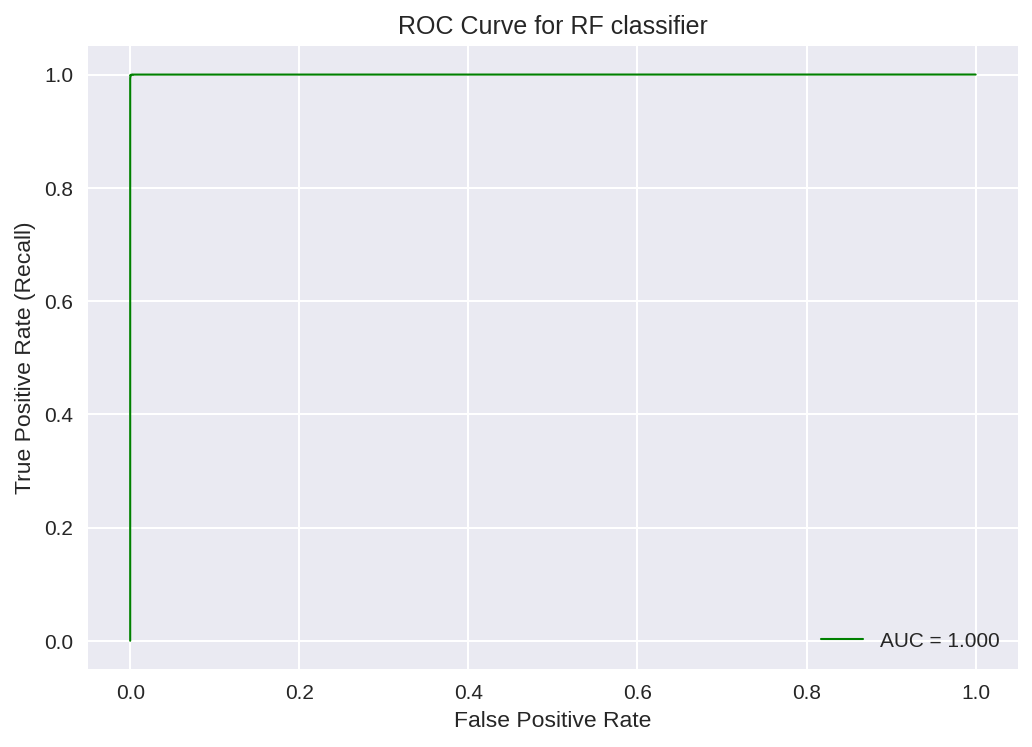

In [58]:
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()